In [58]:
import numpy as np
import random as rand
import pandas as pd
import matplotlib.pyplot as plt
from random_geometry_points.plane import Plane

from mpl_toolkits.mplot3d import Axes3D



In [72]:
###### Definiciones y dominios #######
Phi = np.arange(0, 2 * np.pi, 0.001)
Radio = 100
Theta = np.arange(0, np.pi/2, 0.001)    ### Semi-esfera de radio 100 unidades

long_x = np.arange(0, 10, 0.001)
long_y = np.arange(0, 10, 0.001)
# long_z = np.arange(0, 10, 0.001)

def dis_probability(theta, I_0):
    return I_0 * np.cos(theta)

def dis_angular(theta): ## Distribucion angular
    return 1 * np.cos(theta)**2 * np.sin(theta)

def dis_energy(theta): ### Poner la distribución de energías en función del angulo theta
    return False

Theta_true = dis_angular(Theta) ## Distribución angular theta real.

##### Coordenadas Cartesianas Unitarias######
def coord_cartesian(Thet, Phi):
    coord_X = np.sin(Thet) * np.cos(Phi)
    coord_Y = np.sin(Thet) * np.sin(Phi)
    coord_Z = np.cos(Thet)

    Vec_sph = (float(coord_X), float(coord_Y), float(coord_Z))
    return Vec_sph 


<class 'random_geometry_points.plane.Plane'>
Número de planos:  1571
Número de puntos por plano:  10
Número total de eventos simulados:  15710


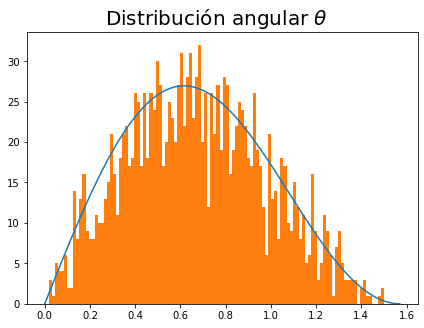

In [87]:
list_random_th = []
list_random_phi = []
list_points_per_plane = []
Vectors = []
Points = []

for i in np.arange(0,len(Theta)):
    list_random_plane_point = []
    Random_th = rand.choices(Theta, Theta_true) ## Escoje un ángulo segun la distribución de Theta_true
    list_random_th.append(Random_th)    ## Lo anexa en una lista

    Random_phi = rand.choice(Phi)   ## Lo mismo pero con phi
    list_random_phi.append(Random_phi)

    # Point = Radio * [ np.sin(Random_th) * np.cos(Random_phi), np.sin(Random_th) * np.sin(Random_phi), np.cos(Random_th)]
    Vec = coord_cartesian(Random_th, Random_phi)
    # print(type(Vec[0]))
    Point = (Radio * Vec[0], Radio * Vec[1], Radio * Vec[2])  ## Genera un punto sobre la esfera.
    Points.append(Point)

    normal_Vec = (-1 * Vec[0], -1 * Vec[1], -1 * Vec[2])     ## Es un vector apuntando hacia el centro de coordenadas
    # print(len(normal_Vec))
    Vectors.append(normal_Vec)

    plane = Plane(normal_vec = Vec, d_origin = Radio, ref_point = Point, radius = 10.0)   ## Se crea el plano sobre la esfera
    for i in np.arange(0,10):
        random_plane_point = plane.create_random_points(1)   ## Selección aleatoria de un punto sobre el plano
        list_random_plane_point.append(random_plane_point)

    list_points_per_plane.append(list_random_plane_point)

print(type(plane))
random_th_array = np.array(list_random_th)
random_phi_array = np.array(list_random_phi)
# type(Random_th)
# len(Random_th)
# Random_th

fig, axs = plt.subplots(figsize=[7,5])

# Theta
axs.plot(Theta, 70 * Theta_true)
# plt.plot(Theta_true, Theta)
# plt.plot(list_random_th, Theta, '.')
# plt.plot(Theta_true, list_random_th, '.')

axs.hist(random_th_array, bins = 110)
fig.suptitle(r'Distribución angular $\theta$', y = 0.95, size = 20)


## Phi 
# plt.hist(random_phi_array, bins = 20)
print('Número de planos: ', len(Theta))
print('Número de puntos por plano: ', len(list_points_per_plane[0]))
print('Número total de eventos simulados: ', len(Theta) * len(list_points_per_plane[0]))

plt.show()

/tmp/ipykernel_20295/60619217.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  Ax = Axes3D(fig)


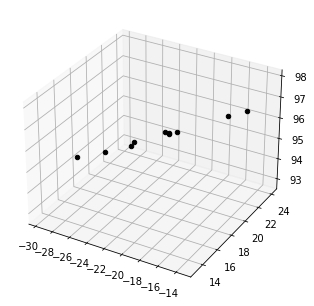

In [86]:
fig = plt.figure()
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')
Ax = Axes3D(fig)

theta = np.arange(0, 2 * np.pi, 0.01)
phi = np.arange(0, np.pi/2, 0.01)
theta, phi = np.meshgrid(theta, phi)

# Definimos los datos de prueba
for i in np.arange(0, len(list_points_per_plane[0])):
    x = list_points_per_plane[0][i][0][0]
    y = list_points_per_plane[0][i][0][1]
    z = list_points_per_plane[0][i][0][2]
    # print(list_points_per_plane[0][i][0])
    Ax.scatter(x, y, z, c='k', marker='o')

x_s = Radio * np.sin(phi) * np.cos(theta)
y_s = Radio * np.sin(phi) * np.sin(theta)
z_s = Radio * np.cos(phi)

# Agregamos los puntos en el plano 3D

# Ax.plot_surface(x_s, y_s, z_s)

# Mostramos el gráfico
plt.show()


Coordenadas de un punto:  [[(13.685576624457655, 2.8062942918592424, 99.19134290333537)], [(0.12641688318556277, 7.032523965552425, 100.11155653572901)], [(10.08500239102841, 13.033333907772946, 98.95686730377778)], [(4.940654998410266, 7.392678453865947, 99.68697394716409)], [(12.362342979929991, -0.7355858727013498, 99.48910966515957)], [(2.2981385416587248, -1.3284075531049524, 100.36828399348705)], [(8.991340805535723, 4.999976007143122, 99.47150417366103)], [(13.729475188214451, 10.249108775718486, 98.79621528265946)], [(12.746445066399389, 8.005139114058883, 98.99705787110267)], [(6.0778080768743585, -2.7235027253273802, 100.1231840393514)], [(7.3479071031622265, 7.708409012216247, 99.46753723111551)], [(6.285260875151224, 3.9482071308389397, 99.75482909849252)]]


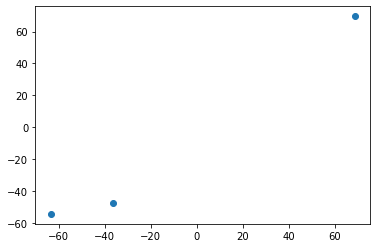

In [78]:
print('Coordenadas de un punto: ', list_points_per_plane[0])
plt.scatter(list_random_plane_point[0], list_random_plane_point[1])

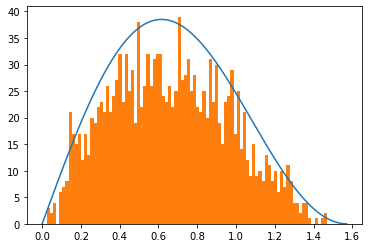

In [68]:
plt.plot(Theta, Theta_true)
# plt.plot(Theta_true, Theta)
# plt.plot(list_random_th, Theta, '.')
# plt.plot(Theta_true, list_random_th, '.')

plt.hist(List_random_th_array, bins = 90)
plt.show()